In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
Hotel_Booking = pd.read_csv('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/hotel_bookings 2.csv')

In [3]:
## Accessing The First Five Rows
Hotel_Booking.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
## Size of the data
Hotel_Booking.shape

(119390, 32)

In [5]:
## Checking The Columns And Their Types
Hotel_Booking.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [6]:
## Describing The Categorical Col and Numerical Cols

In [7]:
Hotel_Booking.describe(include='object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status,reservation_status_date
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3,926
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out,21/10/2015
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166,1461


In [8]:
Hotel_Booking.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [9]:
## Make A Copy Of Data For Analysis
Hotel_Booking_Copy = Hotel_Booking.copy()

In [10]:
## Change The Type Of Col of Reservation Date
Hotel_Booking_Copy['reservation_status_date'] = pd.to_datetime(Hotel_Booking_Copy['reservation_status_date'])

In [11]:
## Checking The Categorical Cols

In [12]:
for col in Hotel_Booking_Copy.describe(include='object'):
    print('Col Name Is:',col,' ','Unique Values Are:',end=' ')
    print(Hotel_Booking_Copy[col].nunique())
    print(Hotel_Booking_Copy[col].value_counts().sort_values(ascending=False))
    print('-'*50)

Col Name Is: hotel   Unique Values Are: 2
City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
--------------------------------------------------
Col Name Is: arrival_date_month   Unique Values Are: 12
August       13877
July         12661
May          11791
October      11160
April        11089
June         10939
September    10508
March         9794
February      8068
November      6794
December      6780
January       5929
Name: arrival_date_month, dtype: int64
--------------------------------------------------
Col Name Is: meal   Unique Values Are: 5
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: meal, dtype: int64
--------------------------------------------------
Col Name Is: country   Unique Values Are: 177
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
       ...  
AIA        1
NCL        1
SDN        1
KIR        1
NAM        1
Name: country, Length: 177, dtype: int64
---------------------

In [13]:
## Checking The Percentage

In [14]:
## For Percentage value we can use also value_counts(normalize=True)

In [15]:
for col in Hotel_Booking_Copy.describe(include='object'):
    print('Col Name is:',col)
    print(round((Hotel_Booking_Copy[col].value_counts()/len(Hotel_Booking_Copy))*100,2))
    print('*'*50)

Col Name is: hotel
City Hotel      66.45
Resort Hotel    33.55
Name: hotel, dtype: float64
**************************************************
Col Name is: arrival_date_month
August       11.62
July         10.60
May           9.88
October       9.35
April         9.29
June          9.16
September     8.80
March         8.20
February      6.76
November      5.69
December      5.68
January       4.97
Name: arrival_date_month, dtype: float64
**************************************************
Col Name is: meal
BB           77.32
HB           12.11
SC            8.92
Undefined     0.98
FB            0.67
Name: meal, dtype: float64
**************************************************
Col Name is: country
PRT    40.70
GBR    10.16
FRA     8.72
ESP     7.18
DEU     6.10
       ...  
DJI     0.00
BWA     0.00
HND     0.00
VGB     0.00
NAM     0.00
Name: country, Length: 177, dtype: float64
**************************************************
Col Name is: market_segment
Online TA        47.30
Offlin

**INSIGHT:** <br>
           1. __66%__ Customer Choose The City Hotel For Reservation.<br>
           2. Highly Hotel Reservation Arrival Month Are **[August,July,May,October,April,June]** And Which                       is __60%__ of Reservation.<br>
           3. Most Likely Ordered Food By Customer is __BB__ (77%) and Less Likely Food By Customer is                    __FB__ (<1%).<br>
           4. Maximum Customer Country is __PRT__(41%) and Others are **[GBR,FRA,ESP,DEU]** (32%).<br>
           5. Higher Rate Of Market Segment is Online (47%) and From Ofline (20%).<br>
           6. Most Likely Distribution Channel is __TA/TO__ (82%).<br>
           7. Customer Highly Choose The Room Type __A__ (72%).<br>
           8. Check Out Percentage Of Total Reservation is (63%) And Cancelled Rate is (36%).<br>

In [16]:
## Checking For The Null Values

In [17]:
missing_value = Hotel_Booking_Copy.isnull().sum()
percentage = round((missing_value/len(Hotel_Booking_Copy))*100,2)

In [18]:
pd.concat([missing_value,percentage],axis=1,keys=['Missing Value','Percentage'])

,Missing Value,Percentage
hotel,0,0.00
is_canceled,0,0.00
lead_time,0,0.00
arrival_date_year,0,0.00
arrival_date_month,0,0.00
arrival_date_week_number,0,0.00
arrival_date_day_of_month,0,0.00
stays_in_weekend_nights,0,0.00
stays_in_week_nights,0,0.00
adults,0,0.00


In [19]:
## Highly Null Values Col is Company and agent So We Can Drop It.
Hotel_Booking_Copy.drop(['company','agent'],axis=1,inplace=True)

In [20]:
## Drop Out The NUll Values From Dataset
Hotel_Booking_Copy.dropna(inplace=True)

In [21]:
## Checking For Missing Values

In [22]:
missing_value = Hotel_Booking_Copy.isnull().sum()

In [23]:
missing_value

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [24]:
## Shape Of the Data
Hotel_Booking_Copy.shape

(118898, 30)

In [25]:
## Checking For The Outliers

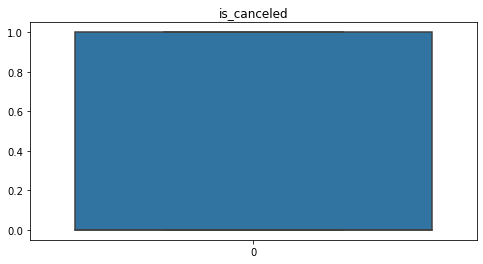

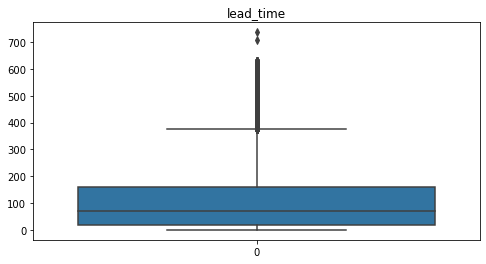

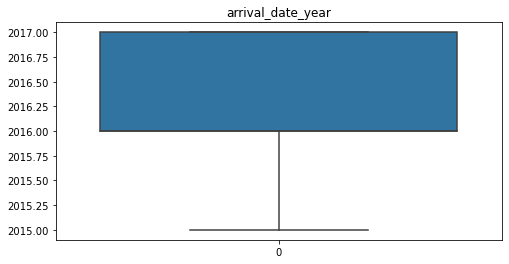

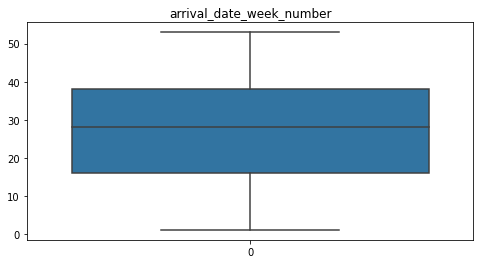

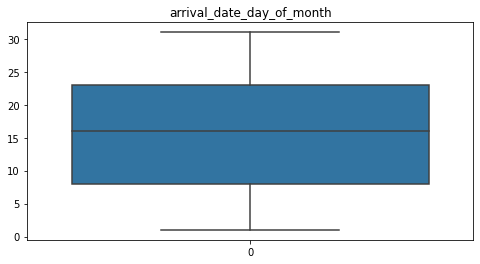

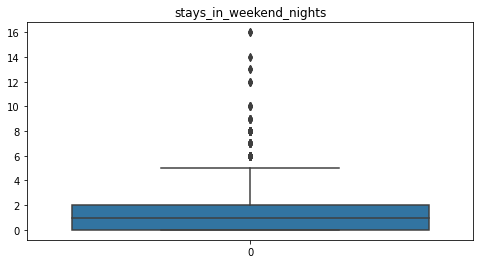

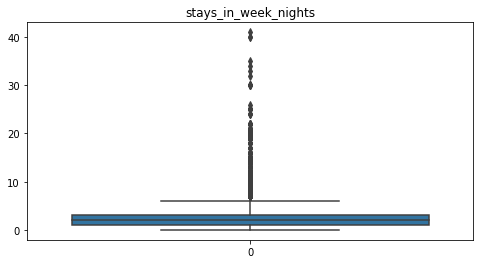

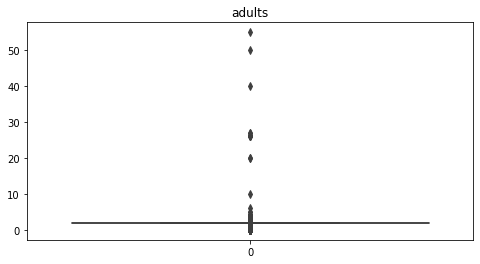

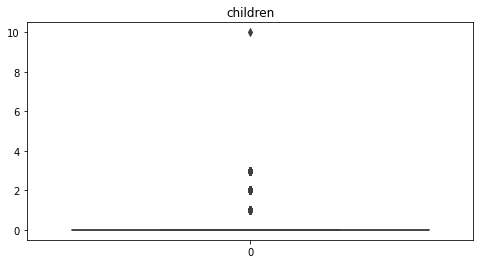

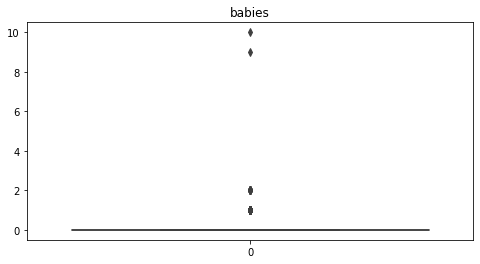

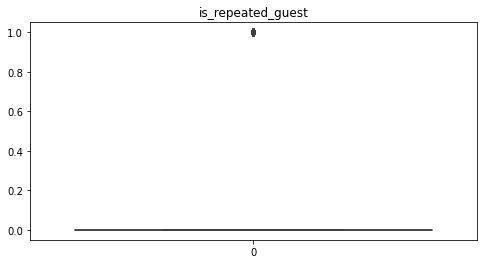

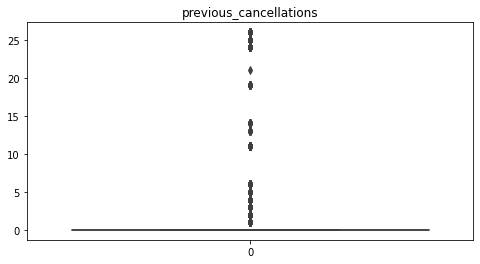

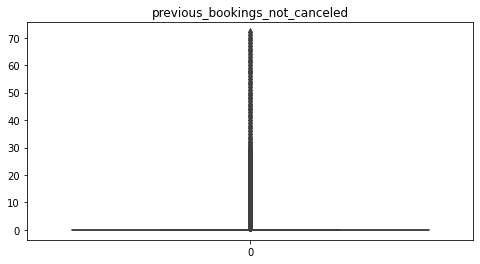

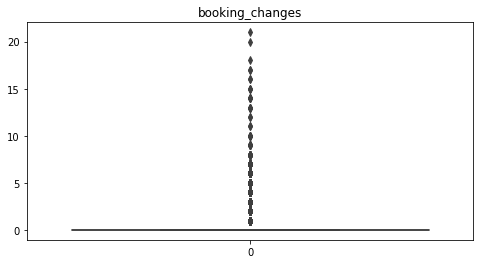

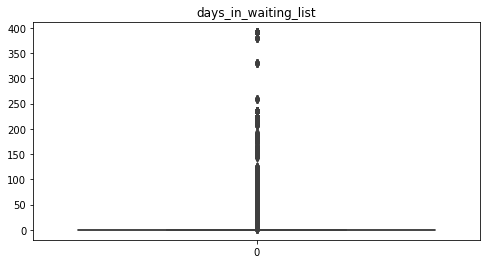

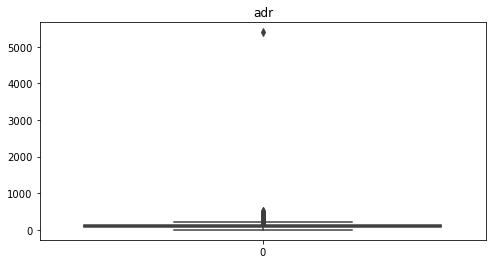

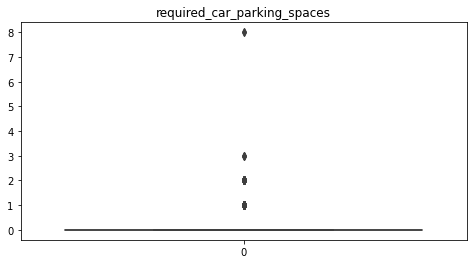

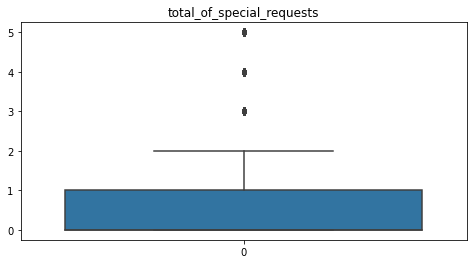

In [26]:
for col in Hotel_Booking_Copy.describe():
    plt.figure(figsize=(8,4))
    sns.boxplot(data=Hotel_Booking_Copy[col])
    plt.title(col)

In [27]:
## Removing The Outliers

In [28]:
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['required_car_parking_spaces']<0.5]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['adr']<500]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['is_repeated_guest']<0.8]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['babies']<1]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['children']<1]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['adults']<10]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['stays_in_weekend_nights']<10]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['total_of_special_requests']<2.5]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['days_in_waiting_list']<250]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['lead_time']<700]
Hotel_Booking_Copy = Hotel_Booking_Copy[Hotel_Booking_Copy['booking_changes']<17.5]

In [29]:
Hotel_Booking_Copy.shape

(98222, 30)

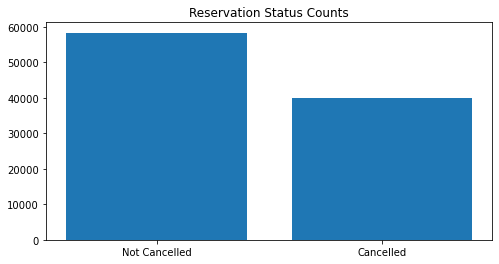

In [52]:
plt.figure(figsize=(8,4))
plt.title('Reservation Status Counts')
plt.bar(['Not Cancelled','Cancelled'],Hotel_Booking_Copy['is_canceled'].value_counts())
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image1.jpg')

**Insight**: <br>
           Cancellation Rate Is Less Than The Not-Cancellation. 

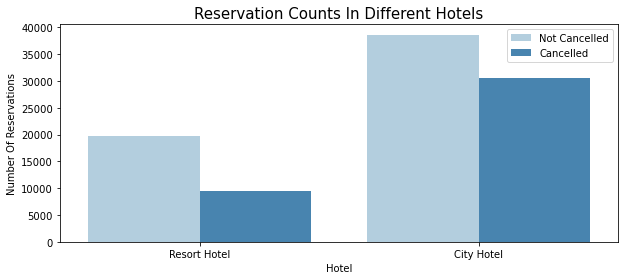

In [53]:
plt.figure(figsize=(10,4))
sns.countplot(x='hotel',hue='is_canceled',data=Hotel_Booking_Copy,palette='Blues')
plt.title('Reservation Counts In Different Hotels', fontsize=15)
plt.xlabel('Hotel')
plt.ylabel('Number Of Reservations')
# plt.legend(loc='upper right')
plt.legend(['Not Cancelled','Cancelled'])
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image2.jpg')

**Insight**:<br>
           In Resort Hotels Reservation Ratio is High Compare to City Hotels
           Because The Cancellation Rate Is High In City Hotels Comapre to Resort Hotels.

In [32]:
Resort_Hotel = Hotel_Booking_Copy[Hotel_Booking_Copy['hotel']=='Resort Hotel']
Resort_Hotel['is_canceled'].value_counts(normalize=True)

0    0.676266
1    0.323734
Name: is_canceled, dtype: float64

In [33]:
City_Hotel = Hotel_Booking_Copy[Hotel_Booking_Copy['hotel']=='City Hotel']
City_Hotel['is_canceled'].value_counts(normalize=True)

0    0.558981
1    0.441019
Name: is_canceled, dtype: float64

**Insight**:<br>
In Resort Hotels Cancellation Rate is Half But In City Hotels Cancellation Rate Is Near to Not Cancellation Rate. 

In [34]:
Resort_Hotel = Resort_Hotel.groupby('reservation_status_date')['adr'].mean()
City_Hotel = City_Hotel.groupby('reservation_status_date')['adr'].mean()

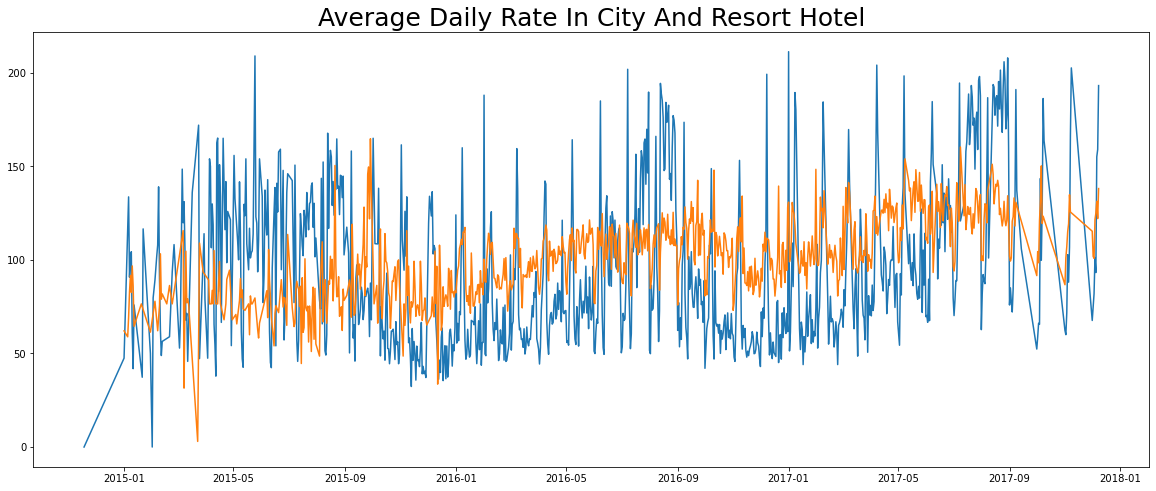

In [54]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate In City And Resort Hotel', fontsize=25)
plt.plot(Resort_Hotel.index,Resort_Hotel,label='Resort Hotel')
plt.plot(City_Hotel.index,City_Hotel,label='City Hotel')
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image3.jpg')

**Insight:**<br>
Here We Can See Clearly The Adr Rate Is High In Resort Hotels Rather Than City Hotels.<br>
And On Some Point It's Go On High Peek. There Can Be Reason Like Weekend.

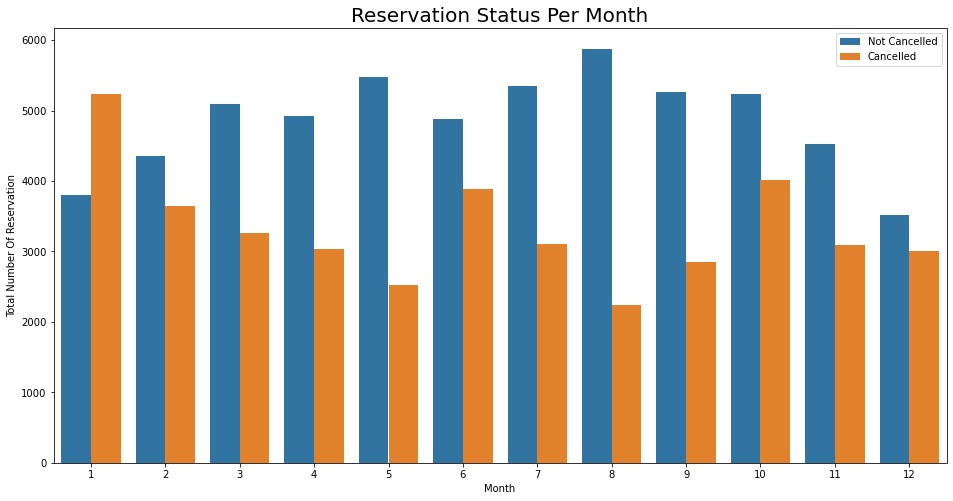

In [55]:
Hotel_Booking_Copy['month'] = Hotel_Booking_Copy['reservation_status_date'].dt.month
plt.figure(figsize=(16,8))
sns.countplot(x='month',hue='is_canceled',data=Hotel_Booking_Copy)
plt.title('Reservation Status Per Month',fontsize=20)
plt.legend(['Not Cancelled','Cancelled'])
plt.xlabel('Month')
plt.ylabel('Total Number Of Reservation')
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image4.jpg')

**Insight**:<br>
In __May__ And __August__ Reservation Rate Is High And Cancellation Rate Is Low.

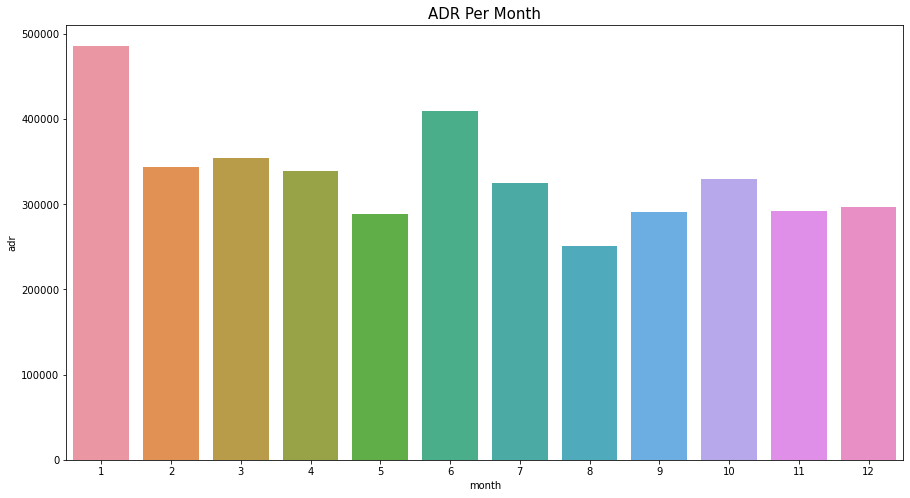

In [56]:
plt.figure(figsize=(15,8))
plt.title('ADR Per Month',fontsize=15)
sns.barplot('month','adr',data=Hotel_Booking_Copy[Hotel_Booking_Copy['is_canceled']==1].groupby('month')['adr'].sum().reset_index())
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image5.jpg')

**Insight**:<br>
Now We Can Clearly See That ADR Is Less In Both Month (May & August) By Which Reason People Does Not Cancelled The Reservation.
<br>
Which Means If Price Is High Than Cancellation Rate Is High And Vice-Versa.

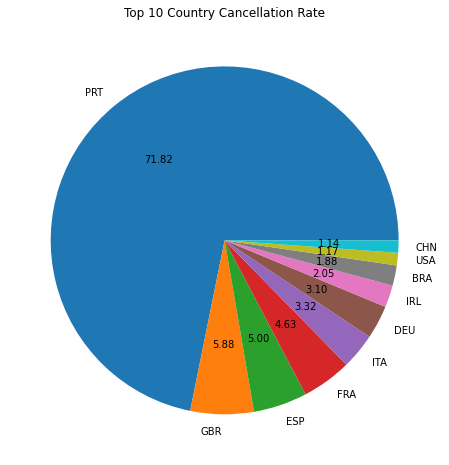

In [57]:
plt.figure(figsize=(8,8))
cancelled_data = Hotel_Booking_Copy[Hotel_Booking_Copy['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:10]
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.title('Top 10 Country Cancellation Rate')
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image6.jpg')

**Insight**:<br>
Highly Cancellation Is Seen In PRT Which is __70%__

In [39]:
## Cancellation Rate Of Different Different Segment

In [40]:
Hotel_Booking_Copy['market_segment'].value_counts(normalize=True)

Online TA        0.452831
Offline TA/TO    0.228930
Groups           0.194661
Direct           0.084054
Corporate        0.033750
Complementary    0.004052
Aviation         0.001721
Name: market_segment, dtype: float64

In [41]:
cancelled_data['market_segment'].value_counts(normalize=True)

Online TA        0.439068
Groups           0.296028
Offline TA/TO    0.201554
Direct           0.038742
Corporate        0.021977
Complementary    0.001604
Aviation         0.001027
Name: market_segment, dtype: float64

**Insights**:<br>
The Cancellation Rate Is Nearer Equal To Reservation Rate of Online Segment.<br>
Best Suited Case Is Direct Segment Where Cancellation Rate Is Very Low Rather Than Other Segment.

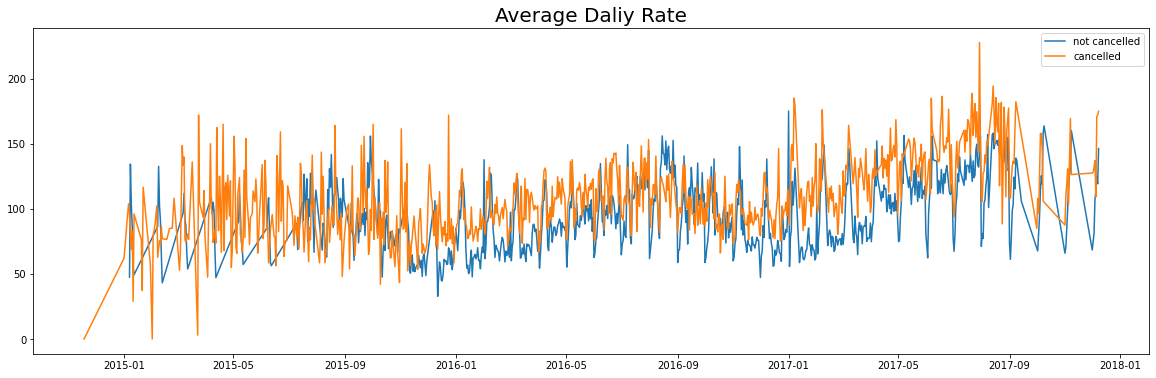

In [58]:
cancelled_adr = cancelled_data.groupby(['reservation_status_date'])['adr'].mean()
cancelled_adr = cancelled_adr.reset_index()
cancelled_adr.sort_values('reservation_status_date',inplace=True)

not_cancelled_data = Hotel_Booking_Copy[Hotel_Booking_Copy['is_canceled']==0]
not_cancelled_adr =  not_cancelled_data.groupby(['reservation_status_date'])['adr'].mean()
not_cancelled_adr =  not_cancelled_adr.reset_index()
not_cancelled_adr.sort_values('reservation_status_date',inplace=True)

plt.figure(figsize=(20,6))
plt.title('Average Daliy Rate',fontsize=20)
plt.plot(not_cancelled_adr['reservation_status_date'],not_cancelled_adr['adr'],label='not cancelled')
plt.plot(cancelled_adr['reservation_status_date'],cancelled_adr['adr'],label='cancelled')
plt.legend()
plt.savefig('/Users/divyanshumittal/Downloads/Data ANalytics Project/Hotel Booking/image7.jpg')

**INSIGHT:**<br>
Here We Can See That Cancelled Rate Is High Rather Than Not Cancelled Rate.